In [1]:
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt
import matplotlib

In [2]:
def f(x, y, z):
    return 2 * np.ones_like(x)

# Number of points per coordinate

In [3]:
n_points_x = 35
n_points_y = 35
n_points_z = 35

# Construct the necessary matrices

In [4]:
(tx, h_1) = np.linspace(0, 1, n_points_x, retstep=True)
(ty, h_2) = np.linspace(0, 1, n_points_y, retstep=True)
(tz, h_3) =  np.linspace(0, 1, n_points_z, retstep=True)
grid_x, grid_y, grid_z = np.meshgrid(tx, ty, tz, indexing="ij")

In [5]:
h1, h2, h3 = h_1, h_2, h_3

In [6]:
b = np.zeros(n_points_x*n_points_y*n_points_z)
matrix = np.zeros((n_points_x*n_points_y*n_points_z, n_points_x*n_points_y*n_points_z), dtype=np.float32)

for i in range(n_points_x*n_points_y*n_points_z):
    idx = np.unravel_index(i, (n_points_x, n_points_y, n_points_z))
    

    if idx[0] == 0:
        matrix[i] *= 0
        matrix[i, i] = 1
        b[i] = 0
        continue
    if idx[0] == n_points_x - 1:
        matrix[i] *= 0
        matrix[i, i] = 1
        b[i] = 0
        continue
        
    if idx[1] == 0:
        matrix[i] *= 0
        matrix[i, i] = 1
        b[i] = 0
        continue       
    if idx[1] == n_points_y - 1:
        matrix[i] *= 0
        matrix[i, i] = 1
        b[i] = 0
        continue
        
    if idx[2] == 0:
        matrix[i] *= 0
        matrix[i, i] = 1
        b[i] = 0
        continue       
    if idx[2] == n_points_z - 1:
        matrix[i] *= 0
        matrix[i, i] = 1
        b[i] = 0
        continue
    
    
    matrix[i, i-n_points_y*n_points_z-n_points_z-1] = -h1*h2/(36*h3) - h1*h3/(36*h2) - h2*h3/(36*h1)
    matrix[i, i-n_points_y*n_points_z-n_points_z] = h1*h2/(18*h3) - h1*h3/(9*h2) - h2*h3/(9*h1)
    matrix[i, i-n_points_y*n_points_z-n_points_z+1] = -h1*h2/(36*h3) - h1*h3/(36*h2) - h2*h3/(36*h1)
    
    matrix[i, i-n_points_y*n_points_z-1] = -h1*h2/(9*h3) - h1*h3/(9*h2) + h2*h3/(18*h1)
    matrix[i, i-n_points_y*n_points_z+0] = 2*h1*h2/(9*h3) - 4*h1*h3/(9*h2) + 2*h2*h3/(9*h1)
    matrix[i, i-n_points_y*n_points_z+1] = -h1*h2/(9*h3) - h1*h3/(9*h2) + h2*h3/(18*h1)
    
    matrix[i, i-n_points_y*n_points_z+n_points_z-1] = -h1*h2/(36*h3) - h1*h3/(36*h2) - h2*h3/(36*h1)
    matrix[i, i-n_points_y*n_points_z+n_points_z+0] = h1*h2/(18*h3) - h1*h3/(9*h2) - h2*h3/(9*h1)
    matrix[i, i-n_points_y*n_points_z+n_points_z+1] = -h1*h2/(36*h3) - h1*h3/(36*h2) - h2*h3/(36*h1)
    
    
    matrix[i, i-n_points_z-1] = -h1*h2/(9*h3) + h1*h3/(18*h2) - h2*h3/(9*h1)
    matrix[i, i-n_points_z-0] = 2*h1*h2/(9*h3) + 2*h1*h3/(9*h2) - 4*h2*h3/(9*h1)
    matrix[i, i-n_points_z+1] = -h1*h2/(9*h3) + h1*h3/(18*h2) - h2*h3/(9*h1)
    
    matrix[i, i-1] = -4*h1*h2/(9*h3) + 2*h1*h3/(9*h2) + 2*h2*h3/(9*h1)
    matrix[i, i+0] = 8*h1*h2/(9*h3) + 8*h1*h3/(9*h2) + 8*h2*h3/(9*h1)
    matrix[i, i+1] = -4*h1*h2/(9*h3) + 2*h1*h3/(9*h2) + 2*h2*h3/(9*h1)
    
    matrix[i, i+n_points_z-1] = -h1*h2/(9*h3) + h1*h3/(18*h2) - h2*h3/(9*h1)
    matrix[i, i+n_points_z+0] = 2*h1*h2/(9*h3) + 2*h1*h3/(9*h2) - 4*h2*h3/(9*h1)
    matrix[i, i+n_points_z+1] = -h1*h2/(9*h3) + h1*h3/(18*h2) - h2*h3/(9*h1)
    

    matrix[i, i+n_points_y*n_points_z-n_points_z-1] = -h1*h2/(36*h3) - h1*h3/(36*h2) - h2*h3/(36*h1)
    matrix[i, i+n_points_y*n_points_z-n_points_z] = h1*h2/(18*h3) - h1*h3/(9*h2) - h2*h3/(9*h1)
    matrix[i, i+n_points_y*n_points_z-n_points_z+1] = -h1*h2/(36*h3) - h1*h3/(36*h2) - h2*h3/(36*h1)
    
    matrix[i, i+n_points_y*n_points_z-1] = -h1*h2/(9*h3) - h1*h3/(9*h2) + h2*h3/(18*h1)
    matrix[i, i+n_points_y*n_points_z+0] = 2*h1*h2/(9*h3) - 4*h1*h3/(9*h2) + 2*h2*h3/(9*h1)
    matrix[i, i+n_points_y*n_points_z+1] = -h1*h2/(9*h3) - h1*h3/(9*h2) + h2*h3/(18*h1)
    
    matrix[i, i+n_points_y*n_points_z+n_points_z-1] = -h1*h2/(36*h3) - h1*h3/(36*h2) - h2*h3/(36*h1)
    matrix[i, i+n_points_y*n_points_z+n_points_z+0] = h1*h2/(18*h3) - h1*h3/(9*h2) - h2*h3/(9*h1)
    matrix[i, i+n_points_y*n_points_z+n_points_z+1] = -h1*h2/(36*h3) - h1*h3/(36*h2) - h2*h3/(36*h1)
    
    
    b[i] = -1 * f(1, 1, 1) * h_1*h_2*h_3

# Solve the system of linear equations

In [ ]:
u_simpson = np.linalg.solve(matrix, b)
u_simpson = u_simpson.reshape(n_points_x, n_points_y, n_points_z)

In [ ]:
a = -u_simpson

In [56]:
size = 10*(a-a.min(keepdims=True))/(a.max(keepdims=True)-a.min(keepdims=True))

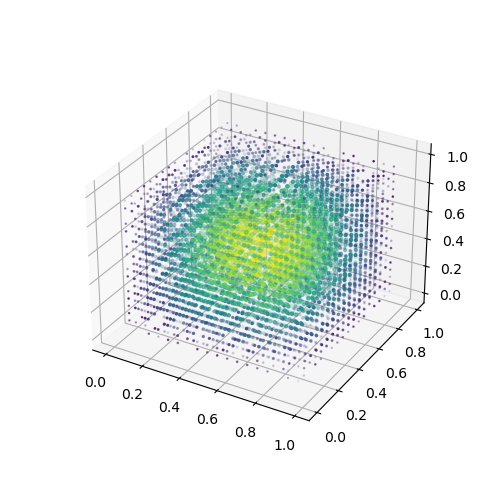

In [60]:
%matplotlib widget
fig = plt.figure(figsize=(5, 5))
ax = plt.axes(projection='3d')
ax.scatter(grid_x, 
           grid_y,
           grid_z,
           c=size,
           s=size,
           alpha=size/10
           )
plt.show()

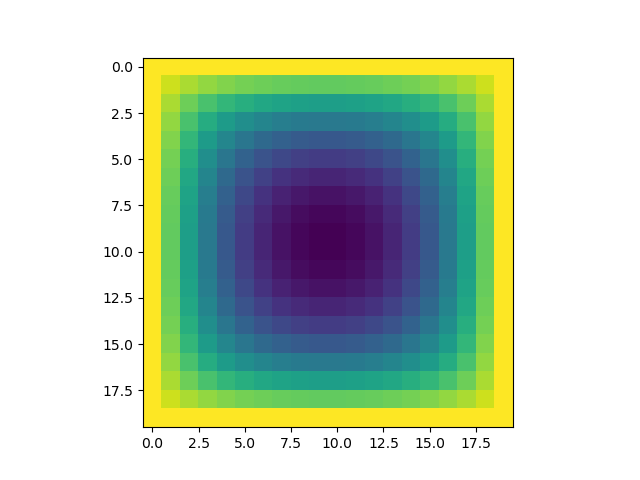

In [63]:
fig, ax = plt.subplots()
ax.imshow(u_simpson[10, ...])